In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 8.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=a9ec8c2ce4deffcb196532afe84c7391eb7203d7794773fe46397aa6fa989a86
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [ ]:
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
!pip install opencv-python
!pip install tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
import pandas as pd
import numpy as np
import tqdm
import glob
import os
import cv2


In [ ]:
import glob
import cv2

for file in glob.glob("/content/drive/My Drive/11777/selected_videos_full/*.avi"):
  print(file)


  vidObj = cv2.VideoCapture(file)

  images = []

  count = 0
  success = True
  sub_count = 0

  missed = False

  while success:

          # vidObj object calls read
          # function extract frames
          success, image = vidObj.read()

          if not success:
            break

          if count %50 == 0 and os.path.exists(file.replace("avi", "pkl").replace("selected_videos_full", "videos_1s")) is False:

            # Saves the frames with frame-count
            cv2.imwrite("frame%d.jpg" % count, image)

            try:
                embedding_objs = DeepFace.represent(img_path = "frame%d.jpg" % count, enforce_detection = False)
                images.append(embedding_objs[0]["embedding"])
                missed = False
                sub_count = 0

            except Exception as e:
                images.append([0]*2622)
                if sub_count == 49:
                 images.append([0]*2622)
                 missed = False
                 sub_count = 0
                else:
                  sub_count += 1
                  missed = True
                print(e)

          # Display the frame
          #cv2.imshow('Frame', image)
          count += 1

  with open(file.replace("avi", "pkl").replace("selected_videos_full", "videos_1s"), 'wb') as f:
      pickle.dump(images, f)




/content/drive/My Drive/11777/selected_videos_full/s01_trial23.avi
/content/drive/My Drive/11777/selected_videos_full/s01_trial10.avi
/content/drive/My Drive/11777/selected_videos_full/s02_trial02.avi
/content/drive/My Drive/11777/selected_videos_full/s02_trial19.avi
/content/drive/My Drive/11777/selected_videos_full/s02_trial39.avi
/content/drive/My Drive/11777/selected_videos_full/s11_trial20.avi
/content/drive/My Drive/11777/selected_videos_full/s13_trial26.avi
/content/drive/My Drive/11777/selected_videos_full/s02_trial05.avi
/content/drive/My Drive/11777/selected_videos_full/s04_trial23.avi
/content/drive/My Drive/11777/selected_videos_full/s09_trial24.avi
/content/drive/My Drive/11777/selected_videos_full/s13_trial14.avi
/content/drive/My Drive/11777/selected_videos_full/s18_trial40.avi


KeyboardInterrupt: ignored

In [ ]:
emotion_dict = {
    "s01_trial10": "High Liking",
    "s01_trial23": "Low Arousal",
    "s02_trial02": "High all",
    "s02_trial05": "Medium",
    "s02_trial19": "High all",
    "s02_trial39": "High Liking",
    "s04_trial23": "High Liking",
    "s09_trial24": "Medium",
    "s11_trial20": "Low Arousal",
    "s13_trial14": "Medium",
    "s13_trial26": "Medium",
    "s18_trial40": "Medium",
    "s22_trial33": "High Arousal",
}

features = []
files = []

for file in glob.glob("/content/drive/My Drive/11777/videos_1s/*.pkl"):

  with open(file, "rb") as fp:   # Unpickling
      data = np.array(pickle.load(fp))


  if len(data) == 0:
    print(file)
  features.append(data)
  files.append(file.replace("/content/drive/My Drive/11777/selected_videos/", "").replace(".pkl", ""))
  files[-1] = emotion_dict[files[-1]]


df = pd.DataFrame({"feature": features, "file": files})
df = df.explode("feature")
display(df)



In [ ]:

features = []
files = []

for file in glob.glob("/content/drive/My Drive/11777/selected_videos/*.pkl"):

  with open(file, "rb") as fp:   # Unpickling
      data = np.array(pickle.load(fp))


  if len(data) == 0:
    print(file)
  features.append(data)
  files.append(file.replace("/content/drive/My Drive/11777/selected_videos/", "").replace(".pkl", ""))


df = pd.DataFrame({"feature": features, "file": files})
df = df.explode("feature")
display(df)

,feature,file
0,"[0.011248611845076084, 0.009755040518939495, 0...",s22_trial33
0,"[0.013862879015505314, 0.013255100697278976, 0...",s22_trial33
0,"[0.014349722303450108, 0.011930258013308048, 0...",s22_trial33
0,"[0.014871949329972267, 0.011241616681218147, 0...",s22_trial33
0,"[0.013889383524656296, 0.01138010248541832, 0....",s22_trial33
...,...,...
7,"[0.009901778772473335, 0.006861736532300711, 0...",s11_trial20
7,"[0.010782763361930847, 0.0055517107248306274, ...",s11_trial20
7,"[0.009443669579923153, 0.007743497379124165, 0...",s11_trial20
7,"[0.009997646324336529, 0.0064467331394553185, ...",s11_trial20


(320, 2622)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 320 samples in 0.002s...
[t-SNE] Computed neighbors for 320 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 320 / 320
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 35.720318
[t-SNE] KL divergence after 1000 iterations: 0.050366


<Axes: xlabel='tSNE1', ylabel='tSNE2'>

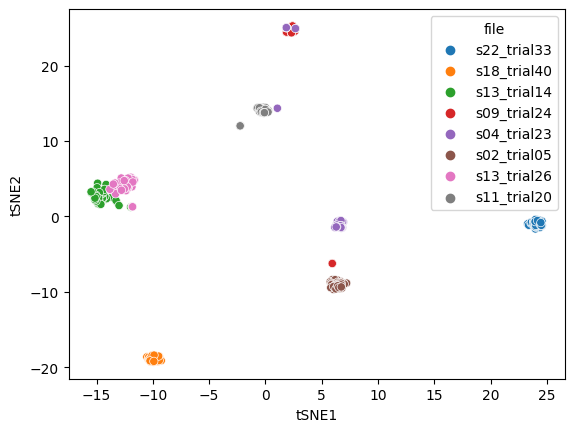

In [ ]:
n =len(df)

data = np.zeros((n, 2622))

idx = 0

for f in features:
  if len(f[0]) != 2622:
    print(f.shape)
    continue
  data[idx:idx+len(f)] = f
  idx += len(f)

print(data.shape)

import sklearn
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(data)

df["tSNE1"] = tsne_results[:,0]
df["tSNE2"] = tsne_results[:,1]

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x="tSNE1", y="tSNE2", hue="file")



In [ ]:

features = []
files = []

for file in ["s01_trial27.pkl", "s01_trial32.pkl", "s08_trial10.pkl", "s08_trial23.pkl","s08_trial27.pkl", "s08_trial32.pkl"]:

  with open("/content/drive/My Drive/11777/"+file, "rb") as fp:   # Unpickling
      data = np.array(pickle.load(fp))

  if len(data) == 0:
    print(file)
  features.append(data)
  files.append(file)


df = pd.DataFrame({"feature": features, "file": files})
df = df.explode("feature")
display(df)

,feature,file
0,"[0.01598692312836647, 0.00988774187862873, -0....",s01_trial27.pkl
0,"[0.0140165314078331, 0.008505540899932384, -0....",s01_trial27.pkl
0,"[0.014916155487298965, 0.011890157125890255, -...",s01_trial27.pkl
0,"[0.014504468999803066, 0.005187352187931538, -...",s01_trial27.pkl
0,"[0.012913255020976067, 0.005067836027592421, 0...",s01_trial27.pkl
...,...,...
5,"[0.007035890594124794, 0.018930722028017044, 0...",s08_trial32.pkl
5,"[0.00677645904943347, 0.02337738871574402, 0.0...",s08_trial32.pkl
5,"[0.006022283807396889, 0.019770517945289612, 0...",s08_trial32.pkl
5,"[0.007564326748251915, 0.022881677374243736, 0...",s08_trial32.pkl


In [ ]:
import sklearn
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(data)

df["tSNE1"] = tsne_results[:,0]
df["tSNE2"] = tsne_results[:,1]

import matplotlib.pyplot as plt


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 15096 samples in 0.031s...
[t-SNE] Computed neighbors for 15096 samples in 32.996s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15096
[t-SNE] Computed conditional probabilities for sample 2000 / 15096
[t-SNE] Computed conditional probabilities for sample 3000 / 15096
[t-SNE] Computed conditional probabilities for sample 4000 / 15096
[t-SNE] Computed conditional probabilities for sample 5000 / 15096
[t-SNE] Computed conditional probabilities for sample 6000 / 15096
[t-SNE] Computed conditional probabilities for sample 7000 / 15096
[t-SNE] Computed conditional probabilities for sample 8000 / 15096
[t-SNE] Computed conditional probabilities for sample 9000 / 15096
[t-SNE] Computed conditional probabilities for sample 10000 / 15096
[t-SNE] Computed conditional probabilities for sample 11000 / 15096
[t-SNE] Computed conditional probabilities for sample 12000 / 15096
[t-SNE] Computed conditional probabilities for s

<Axes: xlabel='tSNE1', ylabel='tSNE2'>

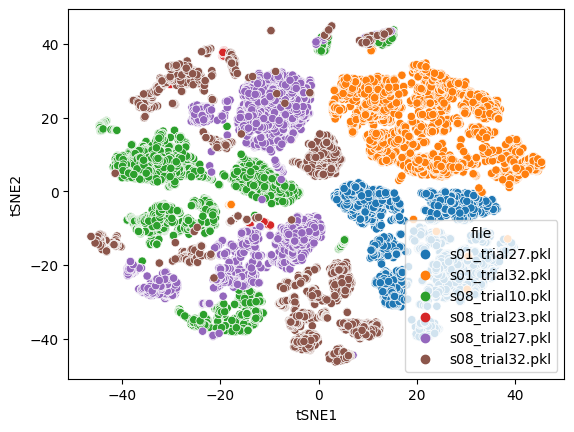

In [ ]:
import seaborn as sns

sns.scatterplot(data=df, x="tSNE1", y="tSNE2", hue="file")

In [ ]:
import pickle

features = []
files = []

for file in ["s01_trial27.pkl", "s08_trial27.pkl", "s10_trial27.pkl", "s16_trial27.pkl"]:

  with open("/content/drive/My Drive/11777/"+file, "rb") as fp:   # Unpickling
      data = np.array(pickle.load(fp))

  if len(data) == 0:
    print(file)
    continue
  features.append(data)
  files.append(file)


df_27 = pd.DataFrame({"feature": features, "file": files})
df_27 = df_27.explode("feature")


n =len(df_27)

data = np.zeros((n, 2622))

idx = 0

for f in features:
  if len(f[0]) != 2622:
    print(f.shape)
    continue
  data[idx:idx+len(f)] = f
  idx += len(f)



print(data.shape)

import sklearn
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(data)

df_27["tSNE1"] = tsne_results[:,0]
df_27["tSNE2"] = tsne_results[:,1]

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_27, x="tSNE1", y="tSNE2", hue="file")


s10_trial27.pkl
(9000, 2622)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9000 samples in 0.020s...
[t-SNE] Computed neighbors for 9000 samples in 18.002s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9000
[t-SNE] Computed conditional probabilities for sample 2000 / 9000
[t-SNE] Computed conditional probabilities for sample 3000 / 9000
[t-SNE] Computed conditional probabilities for sample 4000 / 9000
[t-SNE] Computed conditional probabilities for sample 5000 / 9000
[t-SNE] Computed conditional probabilities for sample 6000 / 9000
[t-SNE] Computed conditional probabilities for sample 7000 / 9000
[t-SNE] Computed conditional probabilities for sample 8000 / 9000
[t-SNE] Computed conditional probabilities for sample 9000 / 9000
[t-SNE] Mean sigma: 0.022455
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.949783
[t-SNE] KL divergence after 500 iterations: 1.356476


NameError: ignored

(12000, 2622)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12000 samples in 0.025s...
[t-SNE] Computed neighbors for 12000 samples in 28.089s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12000
[t-SNE] Computed conditional probabilities for sample 2000 / 12000
[t-SNE] Computed conditional probabilities for sample 3000 / 12000
[t-SNE] Computed conditional probabilities for sample 4000 / 12000
[t-SNE] Computed conditional probabilities for sample 5000 / 12000
[t-SNE] Computed conditional probabilities for sample 6000 / 12000
[t-SNE] Computed conditional probabilities for sample 7000 / 12000
[t-SNE] Computed conditional probabilities for sample 8000 / 12000
[t-SNE] Computed conditional probabilities for sample 9000 / 12000
[t-SNE] Computed conditional probabilities for sample 10000 / 12000
[t-SNE] Computed conditional probabilities for sample 11000 / 12000
[t-SNE] Computed conditional probabilities for sample 12000 / 12000
[t-SNE] Mean sigma: 0.000000
[t-SN

<Axes: xlabel='tSNE1', ylabel='tSNE2'>

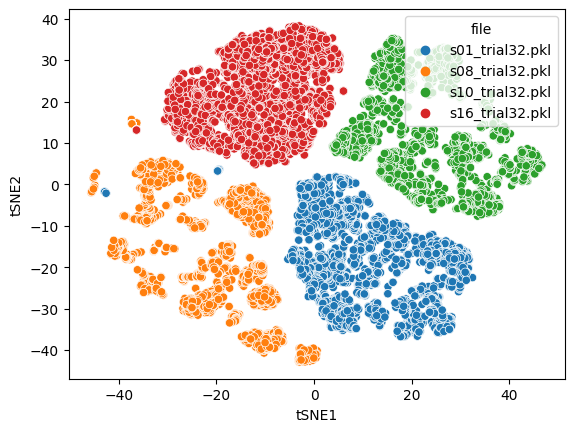

In [ ]:
import pickle

features = []
files = []

for file in ["s01_trial32.pkl", "s08_trial32.pkl", "s10_trial32.pkl", "s16_trial32.pkl"]:

  with open("/content/drive/My Drive/11777/"+file, "rb") as fp:   # Unpickling
      data = np.array(pickle.load(fp))

  if len(data) == 0:
    print(file)
    continue
  features.append(data)
  files.append(file)


df_27 = pd.DataFrame({"feature": features, "file": files})
df_27 = df_27.explode("feature")


n =len(df_27)

data = np.zeros((n, 2622))

idx = 0

for f in features:
  if len(f[0]) != 2622:
    print(f.shape)
    continue
  data[idx:idx+len(f)] = f
  idx += len(f)



print(data.shape)

import sklearn
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(data)

df_27["tSNE1"] = tsne_results[:,0]
df_27["tSNE2"] = tsne_results[:,1]

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_27, x="tSNE1", y="tSNE2", hue="file")


<Axes: xlabel='tSNE1', ylabel='tSNE2'>

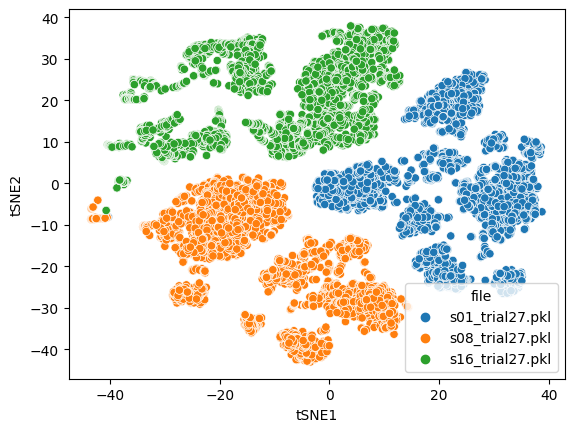

In [ ]:
import seaborn as sns
sns.scatterplot(data=df_27, x="tSNE1", y="tSNE2", hue="file")


(9096, 2622)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9096 samples in 0.011s...
[t-SNE] Computed neighbors for 9096 samples in 11.413s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9096
[t-SNE] Computed conditional probabilities for sample 2000 / 9096
[t-SNE] Computed conditional probabilities for sample 3000 / 9096
[t-SNE] Computed conditional probabilities for sample 4000 / 9096
[t-SNE] Computed conditional probabilities for sample 5000 / 9096
[t-SNE] Computed conditional probabilities for sample 6000 / 9096
[t-SNE] Computed conditional probabilities for sample 7000 / 9096
[t-SNE] Computed conditional probabilities for sample 8000 / 9096
[t-SNE] Computed conditional probabilities for sample 9000 / 9096
[t-SNE] Computed conditional probabilities for sample 9096 / 9096
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.779221
[t-SNE] KL divergence after 500 iterations: 1.195880


<Axes: xlabel='tSNE1', ylabel='tSNE2'>

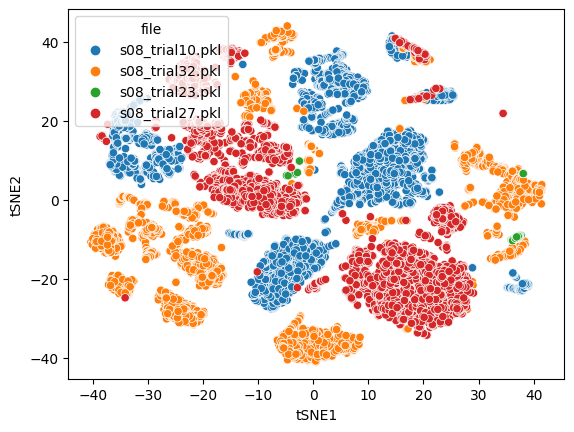

In [ ]:
import pickle

features = []
files = []

for file in ["s08_trial10.pkl", "s08_trial32.pkl","s08_trial23.pkl","s08_trial27.pkl"]:

  with open("/content/drive/My Drive/11777/"+file, "rb") as fp:   # Unpickling
      data = np.array(pickle.load(fp))

  if len(data) == 0:
    print(file)
    continue
  features.append(data)
  files.append(file)


df_08 = pd.DataFrame({"feature": features, "file": files})
df_08 = df_08.explode("feature")


n =len(df_08)

data = np.zeros((n, 2622))

idx = 0

for f in features:
  if len(f[0]) != 2622:
    print(f.shape)
    continue
  data[idx:idx+len(f)] = f
  idx += len(f)



print(data.shape)

import sklearn
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(data)

df_08["tSNE1"] = tsne_results[:,0]
df_08["tSNE2"] = tsne_results[:,1]

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_08, x="tSNE1", y="tSNE2", hue="file")

(12000, 2622)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12000 samples in 0.015s...
[t-SNE] Computed neighbors for 12000 samples in 20.015s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12000
[t-SNE] Computed conditional probabilities for sample 2000 / 12000
[t-SNE] Computed conditional probabilities for sample 3000 / 12000
[t-SNE] Computed conditional probabilities for sample 4000 / 12000
[t-SNE] Computed conditional probabilities for sample 5000 / 12000
[t-SNE] Computed conditional probabilities for sample 6000 / 12000
[t-SNE] Computed conditional probabilities for sample 7000 / 12000
[t-SNE] Computed conditional probabilities for sample 8000 / 12000
[t-SNE] Computed conditional probabilities for sample 9000 / 12000
[t-SNE] Computed conditional probabilities for sample 10000 / 12000
[t-SNE] Computed conditional probabilities for sample 11000 / 12000
[t-SNE] Computed conditional probabilities for sample 12000 / 12000
[t-SNE] Mean sigma: 0.000000
[t-SN

<Axes: xlabel='tSNE1', ylabel='tSNE2'>

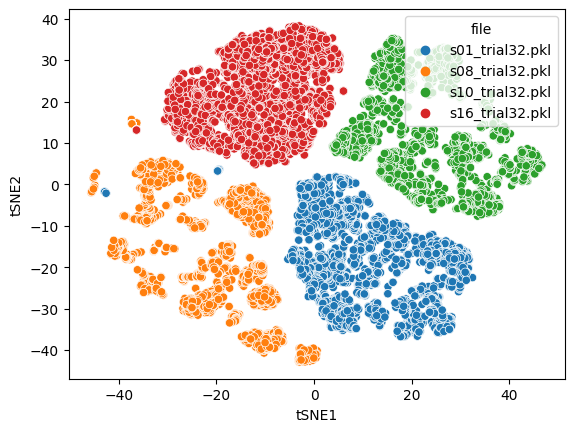

In [ ]:
import pickle

features = []
files = []

for file in ["s01_trial32.pkl", "s08_trial32.pkl","s10_trial32.pkl","s16_trial32.pkl"]:

  with open("/content/drive/My Drive/11777/"+file, "rb") as fp:   # Unpickling
      data = np.array(pickle.load(fp))

  if len(data) == 0:
    print(file)
    continue
  features.append(data)
  files.append(file)


df_32 = pd.DataFrame({"feature": features, "file": files})
df_32 = df_32.explode("feature")


n =len(df_32)

data = np.zeros((n, 2622))

idx = 0

for f in features:
  if len(f[0]) != 2622:
    print(f.shape)
    continue
  data[idx:idx+len(f)] = f
  idx += len(f)



print(data.shape)

import sklearn
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(data)

df_32["tSNE1"] = tsne_results[:,0]
df_32["tSNE2"] = tsne_results[:,1]

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_32, x="tSNE1", y="tSNE2", hue="file")

0      0.0
0      0.0
0      0.0
0      0.0
0      0.0
     ...  
0    199.0
0    199.0
0    199.0
0    199.0
0    199.0
Name: cluster, Length: 3000, dtype: float64
(3000, 2622)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.008s...
[t-SNE] Computed neighbors for 3000 samples in 1.698s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 0.026207
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.605438
[t-SNE] KL divergence after 500 iterations: 1.095695


<Axes: xlabel='tSNE1', ylabel='tSNE2'>

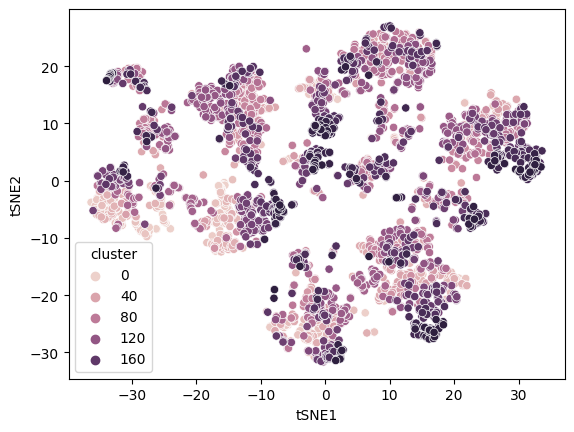

In [ ]:
import pickle

features = []
files = []

for file in ["s10_trial32.pkl"]:

  with open("/content/drive/My Drive/11777/"+file, "rb") as fp:   # Unpickling
      data = np.array(pickle.load(fp))

  if len(data) == 0:
    print(file)
    continue
  features.append(data)
  files.append(file)


df_32 = pd.DataFrame({"feature": features, "file": files})
df_32 = df_32.explode("feature")


n =len(df_32)

df_32["cluster"] = np.floor(np.array(range(n))/250)
print(df_32["cluster"])

data = np.zeros((n, 2622))

idx = 0

for f in features:
  if len(f[0]) != 2622:
    print(f.shape)
    continue
  data[idx:idx+len(f)] = f
  idx += len(f)



print(data.shape)

import sklearn
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(data)

df_32["tSNE1"] = tsne_results[:,0]
df_32["tSNE2"] = tsne_results[:,1]

# df_32["cluster"] = df_32["cluster"].apply(lambda x: str(x))
# print(df_32["cluster"])

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_32, x="tSNE1", y="tSNE2", hue="cluster")

<ipython-input-15-a26be2c8312f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = df["cluster"].apply(lambda x: str(x))


<Axes: xlabel='tSNE1', ylabel='tSNE2'>

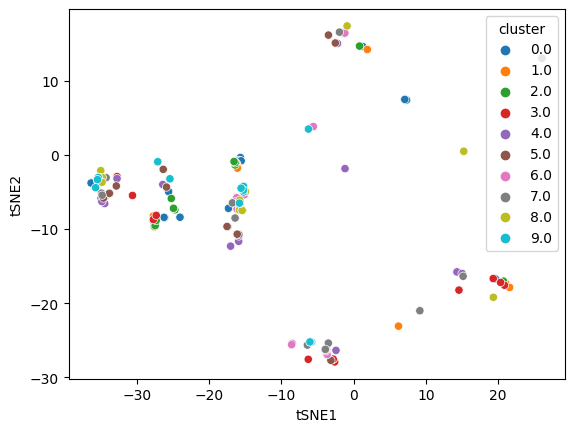

In [ ]:
df = df_32.iloc[:150]
df["cluster"] = df["cluster"].apply(lambda x: str(x))

sns.scatterplot(data=df, x="tSNE1", y="tSNE2", hue="cluster")

In [ ]:
import pickle

features = []
files = []

for file in ["s08_trial10.pkl", "s08_trial32.pkl","s08_trial23.pkl","s08_trial27.pkl"]:

  with open("/content/drive/My Drive/11777/"+file, "rb") as fp:   # Unpickling
      data = np.array(pickle.load(fp))

  if len(data) == 0:
    print(file)
    continue
  features.append(data)
  files.append(file)


df_08 = pd.DataFrame({"feature": features, "file": files})
df_08 = df_08.explode("feature")


n =len(df_08)

data = np.zeros((n, 2622))

idx = 0

for f in features:
  if len(f[0]) != 2622:
    print(f.shape)
    continue
  data[idx:idx+len(f)] = f
  idx += len(f)



print(data.shape)

import sklearn
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(data)

df_08["tSNE1"] = tsne_results[:,0]
df_08["tSNE2"] = tsne_results[:,1]

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_08, x="tSNE1", y="tSNE2", hue="file")

In [ ]:
import cv2

videos_to_process = ["s10_trial27.avi", "s16_trial27.avi", "s10_trial32.avi", "s16_trial32.avi" ]

for video in videos_to_process:
  vidObj = cv2.VideoCapture("/content/drive/My Drive/11777/"+video)

  images = []

  count = 0
  success = True

  while success:

          # vidObj object calls read
          # function extract frames
          success, image = vidObj.read()

          if not success:
            break

          # Saves the frames with frame-count
          cv2.imwrite("frame%d.jpg" % count, image)
          try:
            embedding_objs = DeepFace.represent(img_path = "frame%d.jpg" % count)
            images.append(embedding_objs[0]["embedding"])
          except Exception as e:
            images.append([0]*2622)
            print(e)


          if count %100 == 0:
            print(count)
          count += 1

  with open('/content/drive/My Drive/11777/'+video.replace("avi", "pkl"), 'wb') as f:
      pickle.dump(images, f)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
0
100
200
Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
300
400
Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


In [ ]:
import cv2

videos_to_process = ["s10_trial27.avi", "s16_trial27.avi", "s10_trial32.avi", "s16_trial32.avi" ]

for video in videos_to_process:
  vidObj = cv2.VideoCapture("/content/drive/My Drive/11777/"+video)

  images = []

  count = 0
  success = True

  while success:

          # vidObj object calls read
          # function extract frames
          success, image = vidObj.read()

          if not success:
            break

          # Saves the frames with frame-count
          cv2.imwrite("frame%d.jpg" % count, image)
          try:
            embedding_objs = DeepFace.represent(img_path = "frame%d.jpg" % count)
            images.append(embedding_objs[0]["embedding"])
          except Exception as e:
            images.append([0]*2622)
            print(e)


          if count %100 == 0:
            print(count)
          count += 1

  with open('/content/drive/My Drive/11777/'+video.replace("avi", "pkl"), 'wb') as f:
      pickle.dump(images, f)


In [ ]:
features = []
files = []

for file in ["s10_trial27.pkl", "s16_trial27.pkl","s10_trial27.pkl", "s16_trial32.pkl"]:

  with open("/content/drive/My Drive/11777/"+file, "rb") as fp:   # Unpickling
      data = np.array(pickle.load(fp))

  if len(data) == 0:
    print(file)
  features.append(data)
  files.append(file)


df = pd.DataFrame({"feature": features, "file": files})
df = df.explode("feature")

FileNotFoundError: ignored

In [ ]:
import cv2
vidObj = cv2.VideoCapture("/content/drive/My Drive/11777/s08_trial27.avi")

images = []

count = 0
success = True

while success:

        # vidObj object calls read
        # function extract frames
        success, image = vidObj.read()

        # Saves the frames with frame-count
        cv2.imwrite("frame%d.jpg" % count, image)
        try:
          embedding_objs = DeepFace.represent(img_path = "frame%d.jpg" % count)
          images.append(embedding_objs[0]["embedding"])
        except Exception as e:
          images.append([0]*2622)
          print(e)


        if count %100 == 0:
          print(count)

        # Display the frame
        #cv2.imshow('Frame', image)
        count += 1

with open('/content/drive/My Drive/11777/s08_trial27.pkl', 'wb') as f:
    pickle.dump(images, f)

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:11<00:00, 51.2MB/s]


0
Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
100
Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Face could not be detected. Please confirm that the picture is a face photo or consider to 

error: ignored

In [ ]:
with open('/content/drive/My Drive/11777/s08_trial27.pkl', 'wb') as f:
    pickle.dump(images, f)

In [ ]:
import cv2
vidObj = cv2.VideoCapture("/content/drive/My Drive/11777/s08_trial32.avi")

images = []

count = 0
success = True

while success:

        # vidObj object calls read
        # function extract frames
        success, image = vidObj.read()

        if not success:
          break

        # Saves the frames with frame-count
        cv2.imwrite("frame%d.jpg" % count, image)
        try:
          embedding_objs = DeepFace.represent(img_path = "frame%d.jpg" % count)
          images.append(embedding_objs[0]["embedding"])
        except Exception as e:
          images.append([0]*2622)
          print(e)


        if count %100 == 0:
          print(count)

        # Display the frame
        #cv2.imshow('Frame', image)
        count += 1

with open('/content/drive/My Drive/11777/s08_trial32.pkl', 'wb') as f:
    pickle.dump(images, f)

0
100
200
Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
300
Face could not be detected. Please confirm that the picture is a face photo or cons

In [ ]:
import numpy as np


a = np.array(images)

print(a.shape)

print(np.var(a, axis=1))

print(np.mean(a, axis=1))

print(np.std(a, axis=1))
print(np.divide(np.var(a, axis=1),np.mean(a, axis=1) ))


(3000, 2622)
[1.28126788e-04 8.69518650e-05 1.45926923e-04 ... 6.88175406e-05
 1.09769091e-04 6.81515212e-05]
[4.39230639e-07 5.44472720e-07 5.16440856e-07 ... 5.77052932e-07
 6.27825056e-07 5.48766992e-07]
[0.01131931 0.0093248  0.01208002 ... 0.00829563 0.01047707 0.00825539]
[291.70730906 159.69921307 282.56270031 ... 119.25689436 174.84025173
 124.19027043]
